# Exercise: Root Finding 2
**강좌**: *Numerical Analysis*

**Due**: 2024/10/8

## Problem #1
Write a function to find a root using the Newton method with the following specifications:
- Use a for loop with a specified maximum number of iterations.
- Input parameters
   * function *f*
   * derivative *fp*
   * intial guess: x0
   * tolerance *tol*
   * maximum iterations *iter_max*
   * (Optional) Boolean verbose keyword to print intermediate results. The default is False.
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [11]:
# Write your answer
def newton(f, fp, x0, tol=1e-6, iter_max=50):
    # YOUR CODE HERE
    '''
    Newton-Raphson method
    --------
    f : function 
        원함수
    fp : function
        미분 함수
    initial quess : float
        초기값
    tol : float
        허용오차
    iter_max : int
        최대 반복 횟수
    '''
    for i in range(iter_max) :
        xn = x0 - f(x0)/fp(x0)
        error = abs(xn - x0) 

        if error > tol :
            x0 = xn 
            print(f"converged {i}: {x0}, error : {error}")

        else : 
            print(f"sol : {xn}")
            return xn
    raise ValueError("Did not converge within the maximum number of iterations.")


In [ ]:
import numpy as np
f = lambda x : x**2 + 10*np.sin(x)
fp = lambda x: 2*x + 10*np.cos(x)

assert abs(newton(f, fp, x0=-4) - (-2.47948)) < 5e-5
assert abs(newton(f, fp, x0=-1) - (0.0)) < 1e-6
assert abs(newton(f, fp, x0=0)- (0.0)) < 1e-6

converged 0: -2.3786930568939946, error : 1.6213069431060054
converged 1: -2.4831523677029708, error : 0.10445931080897619
converged 2: -2.4794860862528916, error : 0.0036662814500791896
converged 3: -2.47948183354708, error : 4.252705811502722e-06
sol : -2.479481833541344
converged 0: 1.1788597139133152, error : 2.1788597139133152
converged 1: -0.5421287672056851, error : 1.7209884811190004
converged 2: 0.10820416615760131, error : 0.6503329333632865
converged 3: 0.0007373735242627161, error : 0.1074667926333386
converged 4: 5.423034706703283e-08, error : 0.000737319293915649
sol : 2.940929958079106e-16
sol : 0.0


## Problem #2
Write a function to find a root using the Secant method with the following specifications:
- Use a for loop with a specified maximum number of iterations.
- Input parameters
   * function *f*
   * intial guesses: $x_0$, $x_{-1}$
   * tolerance *tol*
   * maximum iterations *iter_max*
   * (Optional) Boolean verbose keyword to print intermediate results. The default is False.
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [17]:
# Write your answer
def secant(f, x0, x1, tol=1e-6, iter_max=50):
    # YOUR CODE HERE
    '''
    Secant method
    --------
    f : function 
        원함수
    x0 : float
        이전값
    x1 : float
        초기값
    tol : float
        허용오차
    iter_max : int
        최대 반복 횟수
    '''
    for i in range(iter_max) :
        xn = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        error = abs(xn-x1) 
        if error > tol :
            x0 = x1 
            x1 = xn
            print(f"Converged {i} : {x1}, error : {error}")
        else :
            print(f"sol : {xn}")
            return xn
        
    raise ValueError("Did not converge within the maximum number of iterations.")

In [18]:
f = lambda x : x**2 + 10*np.sin(x)

assert abs(secant(f, x0=-4, x1=-5) - (-2.47948)) < 5e-5
assert abs(secant(f, x0=-1, x1=-1.1) - (0.0)) < 1e-6
assert abs(secant(f, x0=0, x1=-1)- (0.0)) < 1e-6

Converged 0 : -1.8615770603074728, error : 3.138422939692527
Converged 1 : -2.3330450448262763, error : 0.47146798451880345
Converged 2 : -2.5281464068110413, error : 0.19510136198476502
Converged 3 : -2.477074340329707, error : 0.05107206648133422
Converged 4 : -2.479445758492781, error : 0.0023714181630740683
Converged 5 : -2.4794818611279075, error : 3.6102635126322724e-05
sol : -2.479481833541029
Converged 0 : 1.5802523048434418, error : 2.680252304843442
Converged 1 : -0.07798502281096842, error : 1.6582373276544102
Converged 2 : 0.018609381984013337, error : 0.09659440479498176
Converged 3 : -0.00016056873779995637, error : 0.018769950721813294
Converged 4 : -2.891040673044126e-07, error : 0.00016027963373265196
sol : 4.643426763423285e-12
Converged 0 : 0.0, error : 1.0
sol : 0.0


# Problem #3
Determine the highest real root of

$$
f(x) = 2x^3 - 11.7x^2 + 17.7x - 5
$$

(a) Graphically.

(b) Newton-Raphson method with $x_0 = 3$.

(c) Secant method with $x_{-1}=3, x_0=4$.

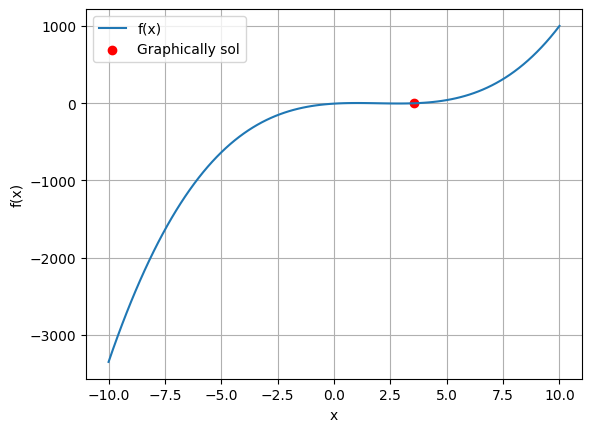

In [24]:
# YOUR CODE HERE
# (a)
from matplotlib import pyplot as plt 

f = lambda x : 2*x**3 - 11.7*x**2 + 17.7*x -5
fp = lambda x : 6*x**2 - 23.4*x + 17.7

x_interval = np.linspace(-10, 10, 101)

plt.plot(x_interval, f(x_interval), label = 'f(x)')
plt.scatter(3.5631608248620537, f(3.5631608248620537), label = 'Graphically sol', color = 'r')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [22]:
# Write your answers (b)
# Save the result in ans_b

# YOUR CODE HERE
ans_b = newton(f, fp, 3)

print(f"newton rhapson sol : {ans_b}")

converged 0: 5.13333333333332, error : 2.1333333333333204
converged 1: 4.26975005653324, error : 0.8635832768000808
converged 2: 3.7929344806432264, error : 0.4768155758900132
converged 3: 3.5998192883980815, error : 0.19311519224514484
converged 4: 3.56433803284734, error : 0.03548125555074133
converged 5: 3.5631621003251914, error : 0.0011759325221487593
converged 6: 3.5631608248635556, error : 1.2754616358634507e-06
sol : 3.5631608248620537
newton rhapson sol : 3.5631608248620537


In [ ]:
# Do not remove!!!

In [25]:
# Write your answers (c)
# Save the result in ans_c

# YOUR CODE HERE
ans_c = secant(f,3,4)

print(f"Secant sol : {ans_c}")

Converged 0 : 3.326530612244898, error : 0.6734693877551021
Converged 1 : 3.4812727094176554, error : 0.15474209717275755
Converged 2 : 3.586275384711736, error : 0.10500267529408047
Converged 3 : 3.56134020948947, error : 0.024935175222265737
Converged 4 : 3.5631226111278784, error : 0.0017824016384082597
Converged 5 : 3.5631608890875883, error : 3.827795970989811e-05
sol : 3.563160824859791
Secant sol : 3.563160824859791


In [ ]:
# Do not remove!!!

## Problem #4
Aerospace engineers sometimes compute the trajectories of projectiles like rockets. A related problem deals with the trajectory of a
thrown ball. The trajectory of a ball is defined by the (x, y) coordinates. The trajectory can be modeled as
$$
y = \tan(\theta_0)x - \frac{g}{2v_0^2\cos^2\theta_0} x^2+y_0
$$
Find the appropriate initial angle $\theta_0$, if the initial velocity $v_0=20m/s$ and the disctance to the catcher $x$ is $40m$. Note that the ball leaves the thrower’s hand at an elevation of $y_0=1.8 m$ and and the catcher receives it at $1m$. Express the fi nal result in degrees. Use a value of $9.81m/s^2$ for $gG.

(a) Graphically and determine the initial guess

(b) Secant method

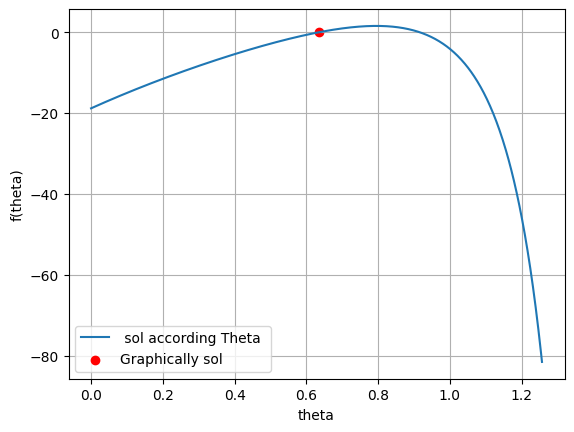

In [36]:
# YOUR CODE HERE
# a
v0 = 20 #m/s
x = 40 #m
y0 = 1.8 #m
y = 1 #m
g = 9.81 #m/s^2

f = lambda theta : np.tan(theta)*x - (g*x**2)/(2*v0**2*np.cos(theta)**2) + (y0 - y)

theta_interval = np.linspace(0, np.pi/2.5, 1000)

plt.plot(theta_interval, f(theta_interval), label =" sol according Theta ")
plt.scatter(0.634947693743998, f(0.634947693743998), label ="Graphically sol", color = 'r')
plt.xlabel("theta")
plt.ylabel('f(theta)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Write your answers (b)
# Save the result in ans_b

# YOUR CODE HERE
# 초기값을 0.6로 가정하고 구한다.
fp = lambda theta: x * (1 / np.cos(theta))**2 + (g * x**2 * np.sin(theta)) / (v0**2 * np.cos(theta)**3)

ans_b = secant(f,0.5, 0.6)
print(ans_b)

Converged 0 : 0.6291659865488376, error : 0.02916598654883762
Converged 1 : 0.6346007089632424, error : 0.005434722414404791
Converged 2 : 0.6349482874555803, error : 0.0003475784923379077
Converged 3 : 0.6349522506876872, error : 3.963232106940495e-06
sol : 0.6349522534621055
0.6349522534621055


In [ ]:
# Do not remove!!!